In [22]:
from ekpy import analysis
import numpy as np
import scipy.integrate as it
from scipy.signal import find_peaks, savgol_filter, peak_widths
import matplotlib.pyplot as plt
from ekpy.analysis.analysisgeotemp import use_analysis_file #note need to make this under __all__

In [23]:
# load the dataset
Data_folder_path = r"C:\Users\geofr\Desktop\Research\Data\FE\PUND\Python"

dset = analysis.load_Dataset(Data_folder_path + '/BTO')

# print dset, parsable collection of meta data which holds pointers to the real data files
dset

,pulse_width,pulse_delay,voltage_max,num_points,step_size,capacitor_area,thickness,permittivity,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,0,fe_PUND_PV__0.csv
1,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,1,fe_PUND_PV__1.csv
2,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,2,fe_PUND_PV__2.csv
3,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,3,fe_PUND_PV__3.csv
4,0.0010,0.100,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000512,-0.011953,0,0.040201,0.0,0,4,fe_PUND_PV__4.csv
5,0.0010,0.100,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000512,-0.011953,0,0.040201,0.0,0,5,fe_PUND_PV__5.csv
6,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,6,fe_PUND_PV__6.csv
7,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,7,fe_PUND_PV__7.csv
8,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,8,fe_PUND_PV__8.csv
9,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,9,fe_PUND_PV__9.csv


In [24]:
data2= dset.select_index(17).get_data()

In [73]:
data2.definition


{'pulse_width': {0.001},
 'pulse_delay': {0.001},
 'voltage_max': {2},
 'num_points': {20},
 'step_size': {nan},
 'capacitor_area': {4e-08},
 'thickness': {1e-08},
 'permittivity': {30},
 'format': {0},
 'type': {0},
 'points': {992},
 'count': {1},
 'x_increment': {1.512e-05},
 'x_origin': {-0.0003515625},
 'x_reference': {0},
 'y_increment': {0.0402010008692741},
 'y_origin': {0.0},
 'y_reference': {0},
 'trial': {17}}

(<Figure size 640x480 with 1 Axes>, <Axes: >)

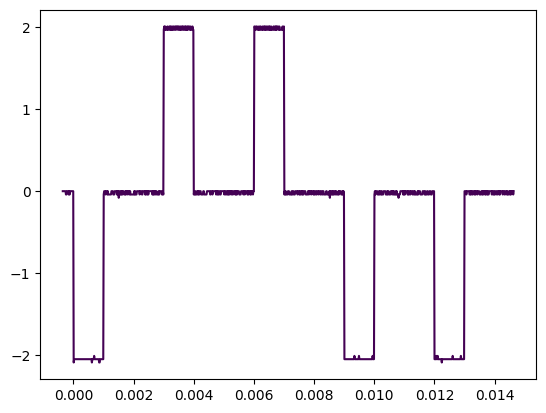

In [26]:
data2.plot('time_v', 'wfm_v')

(<Figure size 640x480 with 1 Axes>, <Axes: >)

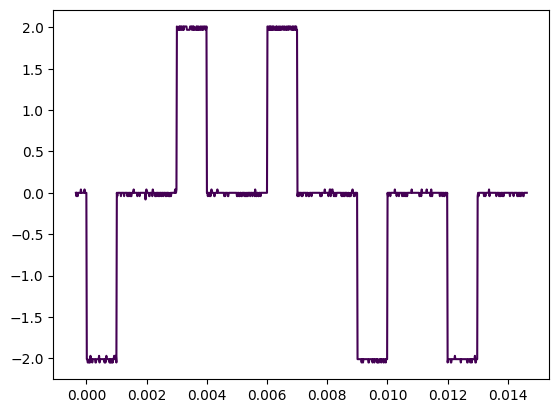

In [186]:
data2.plot('time_c', 'wfm_c')

In [52]:
wfm_v = data2['wfm_v']
wfm_c = data2['wfm_c']
time_v = data2['time_v']
time_c = data2['time_c']
pulse_width = data2['pulse_width']
t_increment = data2['x_increment']

In [60]:
list(pulse_width)[0]/list(t_increment)[0]

66.13756613756614

In [29]:
np.argmax(wfm_v)
wfm_v[223]
len(wfm_v)

992

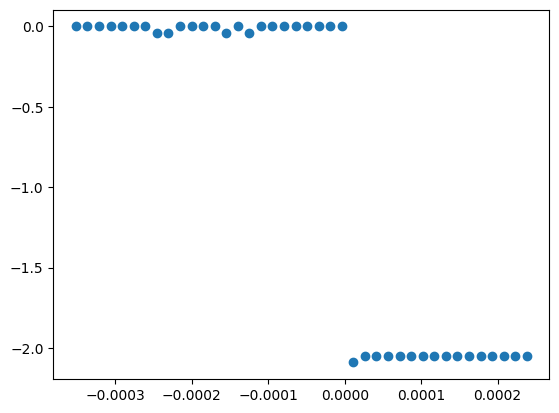

In [30]:
plt.scatter(time_v[:40], wfm_v[:40])

In [31]:
time_v - time_c #therefore same array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [44]:
def find_peaks_troughs_index_start(data_dict)->'dict':
    """
    Adds 'peaks' to the given data_dict by using scipy to find the peaks and troughs.
    modified to skip based on pulse length

    Requirements
    ------------
    wfm_v: dict key 
        The data_dict key containing the voltage wf
    Returns
    -------
    data_dict: dict
        The mutated dictionary with the peaks indexes added.

    MODIFIES: peaks"""
    arr = data_dict['wfm_v']
    arr_normalized = 2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1
    peaks, _ = find_peaks(arr_normalized, height=0.8, distance=50)
    troughs, _ = find_peaks(-1*arr_normalized, height=0.8, distance=50)
    all_peaks = np.concatenate((peaks, troughs), axis=0)
    data_dict['peaks'] = np.sort(all_peaks)
    return data_dict

In [45]:
bet = find_peaks_troughs_index_start(data2.data)
jesus = bet['peaks']
jesus

array([ 24,  80, 230, 281, 421, 486, 629, 683, 833], dtype=int64)

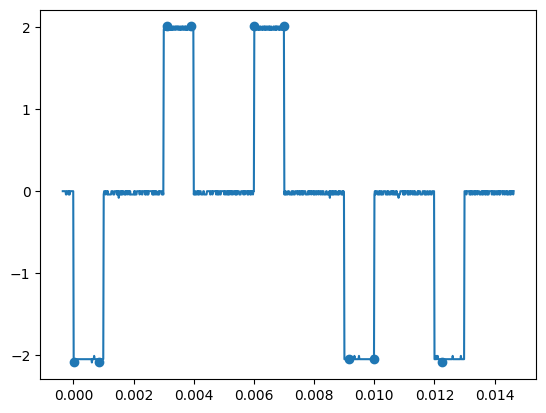

In [46]:
plt.scatter(time_v[jesus], wfm_v[jesus])
plt.plot(time_v, wfm_v)


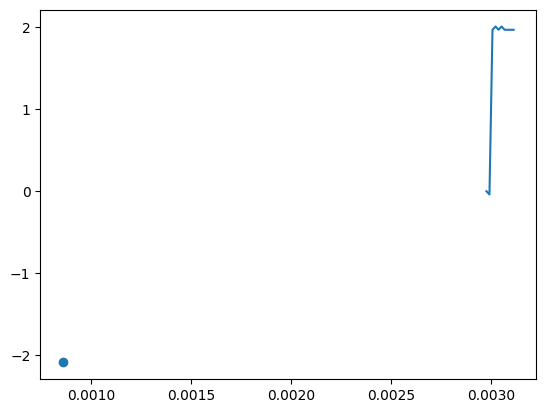

In [35]:
plt.scatter(time_v[jesus[1]], wfm_v[jesus[1]])
plt.plot(time_v[220:230], wfm_v[220:230])

Idea, to get the end of the peak, we just repeat the process with a reversed list, therefore we get the same effect, and then we just reverse it back?

In [47]:
def find_peaks_troughs_index_end(data_dict)->'dict':
    """
    Adds 'peaks' to the given data_dict by using scipy to find the peaks and troughs.
    modified to skip based on pulse length

    Requirements
    ------------
    wfm_v: dict key 
        The data_dict key containing the voltage wf
    Returns
    -------
    data_dict: dict
        The mutated dictionary with the peaks indexes added.

    MODIFIES: peaks"""
    arr = data_dict['wfm_v'][::-1] #reverse the list and repeat process
    arr_normalized = 2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1
    peaks, _ = find_peaks(arr_normalized, height=0.8, distance=50)
    troughs, _ = find_peaks(-1*arr_normalized, height=0.8, distance=50)
    offset = len(arr) - 1
    all_peaks = offset - np.concatenate((peaks, troughs), axis=0) 
    data_dict['peaks_reverse'] = np.sort(all_peaks)
    return data_dict

In [50]:
bet = find_peaks_troughs_index_end(data2.data)
jesus2 = bet['peaks_reverse']
jesus2

array([ 24,  81, 223, 285, 422, 472, 630, 683, 833], dtype=int64)

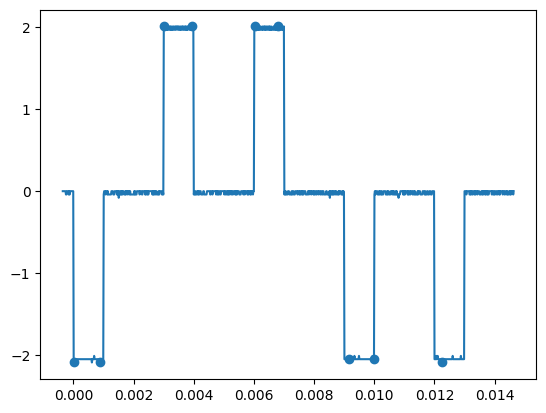

In [51]:
plt.scatter(time_v[jesus2], wfm_v[jesus2])
plt.plot(time_v, wfm_v)

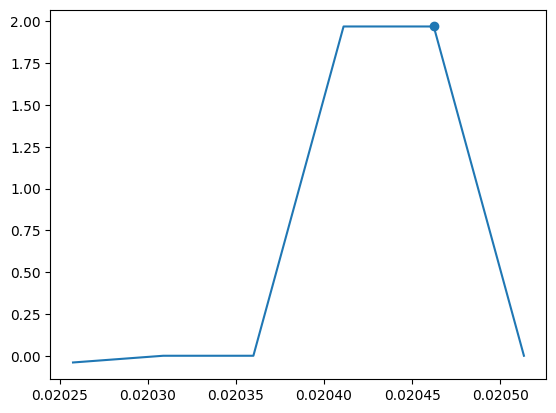

In [21]:
plt.scatter(time_v[jesus2[2]], wfm_v[jesus2[2]])
plt.plot(time_v[419:425], wfm_v[419:425])

okay so we got the start and end of each pulse! now we just need to integrate the respective parts,
do I just integrate everything? and then partition from the parts. lets integrate seperately from place to place

In [19]:
def generate_q_wfm(data_dict) -> 'dict':
    """
    Adds 'wfm_q' to the given data_dict by integrating over the given waveform.

    Requirements
    ------------
    wfm_c: dict key 
        The data_dict key containing the current wf
    time_c: dict key
        The data_dict key containing the time wf
    Returns
    -------
    data_dict: dict
        The mutated dictionary with the q_wfm added.
    PLOT_AGAINST: time_c
    MODIFIES: wfm_q"""
    wfm_q = it.cumulative_trapezoid(data_dict['wfm_c'], data_dict['time_c'], initial=0) 
    data_dict['wfm_q'] = wfm_q
    return data_dict

In [25]:
#lets write the code just for the first set of points
print(jesus, jesus2)

[ 24 223 422 621 821] [ 25 224 422 622 822]


In [41]:
def find_peaks_troughs_index_start_and_end(data_dict)->'dict':
    """
    Adds 'start_and_end' to the given data_dict by using scipy to find the peaks and troughs which only finds the start,
    reverses the list and repeats and then transforms the data to find the end.

    Requirements
    ------------
    wfm_v: dict key 
        The data_dict key containing the voltage wf
    Returns
    -------
    data_dict: dict
        The mutated dictionary with the start and end of the pulses added.

    MODIFIES: start_and_end_pulse"""
    arr = data_dict['wfm_v']
    arr_normalized = 2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1
    peaks, _ = find_peaks(arr_normalized, height=0.8, distance=50)
    troughs, _ = find_peaks(-1*arr_normalized, height=0.8, distance=50)
    all_peaks = np.concatenate((peaks, troughs), axis=0)

    arr2 = data_dict['wfm_v'][::-1]
    arr_normalized2 = 2 * ((arr2 - np.min(arr2)) / (np.max(arr2) - np.min(arr2))) - 1
    peaks2, _ = find_peaks(arr_normalized2, height=0.8, distance=50)
    troughs2, _ = find_peaks(-1*arr_normalized2, height=0.8, distance=50)
    offset = len(arr2) - 1
    all_peaks = offset - np.concatenate((peaks, troughs, peaks2, troughs2), axis=0)

    data_dict['start_and_end_pulse'] = np.sort(all_peaks)
    return data_dict

In [42]:
bet3 = find_peaks_troughs_index_start_and_end(data2.data)
jesus3 = bet3['start_and_end_pulse']
jesus3

array([ 24,  81, 158, 223, 285, 308, 362, 422, 472, 505, 570, 630, 683,
       710, 761, 833, 911, 967], dtype=int64)

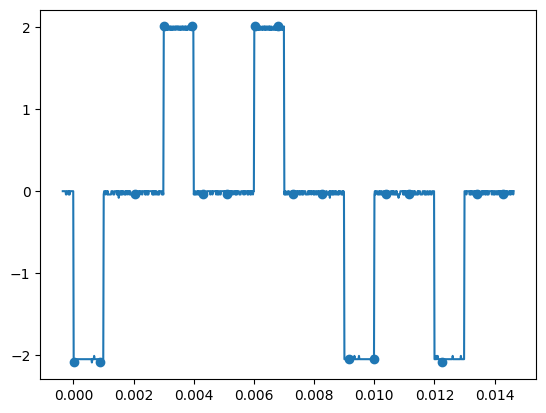

In [43]:
plt.scatter(time_v[jesus3], wfm_v[jesus3])
plt.plot(time_v, wfm_v)

In [114]:
from itertools import islice
import collections

def consume(iterator, n):
    "Advance the iterator n-steps ahead. If n is none, consume entirely."
    # Use functions that consume iterators at C speed.
    if n is None:
        # feed the entire iterator into a zero-length deque
        collections.deque(iterator, maxlen=0)
    else:
        # advance to the empty slice starting at position n
        next(islice(iterator, n, n), None)

In [158]:
#new metho screw scipy
def find_peaks_troughs_index_start(data_dict, **kwargs)->'dict':
    """
    Adds 'peaks' to the given data_dict by using scipy to find the peaks and troughs.
    modified to skip based on pulse length

    Requirements
    ------------
    wfm_v: dict key 
        The data_dict key containing the voltage wf
    Returns
    -------
    data_dict: dict
        The mutated dictionary with the peaks indexes added.

    MODIFIES: peaks"""
    arr = data_dict['wfm_v']
    arr_normalized = np.abs(2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1)
    print(len(arr))
    pulse_width = list(kwargs['pulse_width'])[0]
    t_increment = list(kwargs['x_increment'])[0]
    valid_indexes = []
    threshold = 0.5
    pulse_start = None
    holder = 0
    for i, val in enumerate(arr_normalized):
        if val > threshold:
            if pulse_start is None:
                pulse_start = i
            elif pulse_start is not None:
                valid_indexes.append((pulse_start, i - 1))
                pulse_start = None
            #consume(arr_normalized, pulse_size) #this skips ahead in the loop very efficiently by pulse_size
            #print("consumed", val, index)
    flat_list = [item for sublist in valid_indexes for item in sublist]
    data_dict['tst'] = np.array(flat_list)
    return data_dict

In [159]:
bet4 = data2.apply(find_peaks_troughs_index_start, pass_defn=True)
jesus4 = bet4['tst']
jesus4

992


array([ 24,  24,  26,  26,  28,  28,  30,  30,  32,  32,  34,  34,  36,
        36,  38,  38,  40,  40,  42,  42,  44,  44,  46,  46,  48,  48,
        50,  50,  52,  52,  54,  54,  56,  56,  58,  58,  60,  60,  62,
        62,  64,  64,  66,  66,  68,  68,  70,  70,  72,  72,  74,  74,
        76,  76,  78,  78,  80,  80,  82,  82,  84,  84,  86,  86,  88,
        88, 222, 222, 224, 224, 226, 226, 228, 228, 230, 230, 232, 232,
       234, 234, 236, 236, 238, 238, 240, 240, 242, 242, 244, 244, 246,
       246, 248, 248, 250, 250, 252, 252, 254, 254, 256, 256, 258, 258,
       260, 260, 262, 262, 264, 264, 266, 266, 268, 268, 270, 270, 272,
       272, 274, 274, 276, 276, 278, 278, 280, 280, 282, 282, 284, 284,
       286, 286, 421, 421, 423, 423, 425, 425, 427, 427, 429, 429, 431,
       431, 433, 433, 435, 435, 437, 437, 439, 439, 441, 441, 443, 443,
       445, 445, 447, 447, 449, 449, 451, 451, 453, 453, 455, 455, 457,
       457, 459, 459, 461, 461, 463, 463, 465, 465, 467, 467, 46

In [173]:
import numpy as np

def find_pulse_indices(signal):
    """
    Finds the start and end indices of rectangular pulses in a given signal.

    Args:
        signal (np.ndarray): Input signal (1D array).

    Returns:
        list of tuples: Each tuple contains the start and end indices of a pulse.
    """
    pulse_indices = []
    pulse_start = None
    threshold = 0.8
    for i, value in enumerate(signal):
        if value > threshold:  # Assuming 1 represents the pulse
            if pulse_start is None:
                pulse_start = i
        elif pulse_start is not None:
            pulse_indices.append((pulse_start, i - 1))
            pulse_start = None
    
    return pulse_indices

# Example usage
arr = data2['wfm_v']
arr_normalized = np.abs(2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1)
my_signal = np.abs(arr_normalized)
pulse_indices = find_pulse_indices(my_signal)
flat_list = np.array([item for sublist in pulse_indices for item in sublist])
flat_list


array([ 24,  89, 222, 287, 421, 486, 619, 684, 817, 882])

In [194]:
def find_peaks_troughs_index_start_and_end(data_dict, **kwargs)->'dict':
    """
    Adds 'start_and_end' to the given data_dict by using scipy to find the peaks and troughs which only finds the start,
    reverses the list and repeats and then transforms the data to find the end.

    Requirements
    ------------
    wfm_v: dict key 
        The data_dict key containing the voltage wf
    Returns
    -------
    data_dict: dict
        The mutated dictionary with the start and end of the pulses added.

    MODIFIES: start_and_end_pulse"""
    arr = data_dict['wfm_v']
    arr_normalized = np.abs(2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1)
    my_signal = np.abs(arr_normalized)
    pulse_indices = find_pulse_indices(my_signal)
    print(pulse_indices, 'pulse_indeces')
    flat_list = np.array([item for sublist in pulse_indices for item in sublist])
    print(flat_list)
    data_dict['start_and_end_pulse'] = flat_list
    return data_dict

In [195]:
bet4 = data2.apply(find_peaks_troughs_index_start_and_end, pass_defn=True)
jesus4 = bet4['start_and_end_pulse']
jesus4

[(24, 89), (222, 287), (421, 486), (619, 684), (817, 882)] pulse_indeces
[ 24  89 222 287 421 486 619 684 817 882]


array([ 24,  89, 222, 287, 421, 486, 619, 684, 817, 882])

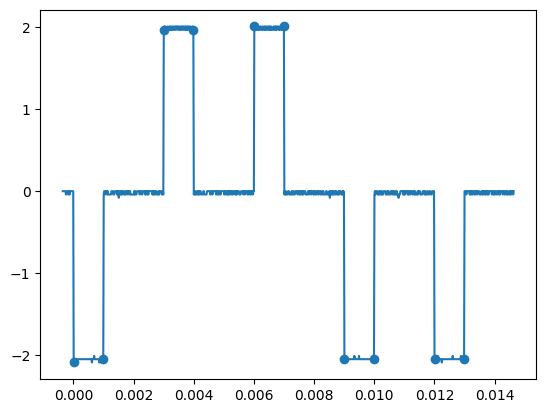

In [196]:
plt.scatter(time_v[jesus4], wfm_v[jesus4])
plt.plot(time_v, wfm_v)

In [197]:
def generate_q_values(data_dict, **kwargs) -> 'dict':
    """
    Adds 'q_vals' to the given data_dict by integrating over the given waveform. Returns a list of values
    corresponding to the 8 measuremnts as described by Radiant used in PUND, p1, p1r, p2, p2r, p3, p3r, p4, p4r

    Requirements
    ------------
    wfm_c: dict key 
        The data_dict key containing the current wf
    time_c: dict key
        The data_dict key containing the time wf
    Returns
    -------
    data_dict: dict
        The mutated dictionary with the q_vals added.
    PLOT_AGAINST: time_c need to change lmao
    MODIFIES: q_vals"""
    start_and_end_pulse = data_dict['start_and_end_pulse'][2:]
    print(start_and_end_pulse)
    pulse_width = list(kwargs['pulse_width'])[0]
    t_increment = list(kwargs['x_increment'])[0]
    pulse_index_len = int(pulse_width/t_increment)
    q1 = it.trapezoid(data_dict['wfm_c'][start_and_end_pulse[0]:start_and_end_pulse[1]], dx=t_increment)
    q2 = it.trapezoid(data_dict['wfm_c'][start_and_end_pulse[2]:start_and_end_pulse[3]], dx=t_increment)
    q3 = it.trapezoid(data_dict['wfm_c'][start_and_end_pulse[4]:start_and_end_pulse[5]], dx=t_increment)
    q4 = it.trapezoid(data_dict['wfm_c'][start_and_end_pulse[6]:start_and_end_pulse[7]], dx=t_increment)

    #time to also got the remnamnt values by using end values plus 1 plus step size to know how long it is

    q1r = it.trapezoid(data_dict['wfm_c'][start_and_end_pulse[1]+1:start_and_end_pulse[1]+pulse_index_len + 1], dx=t_increment)
    q2r = it.trapezoid(data_dict['wfm_c'][start_and_end_pulse[3]+1:start_and_end_pulse[3]+pulse_index_len + 1], dx=t_increment)
    q3r = it.trapezoid(data_dict['wfm_c'][start_and_end_pulse[5]+1:start_and_end_pulse[5]+pulse_index_len + 1], dx=t_increment)
    q4r = it.trapezoid(data_dict['wfm_c'][start_and_end_pulse[7]+1:start_and_end_pulse[7]+pulse_index_len + 1], dx=t_increment)
    



    data_dict['q_vals'] = np.array([q1,q2,q3,q4,q1r,q2r,q3r,q4r])
    return data_dict

In [200]:
bet4 = data2.apply(generate_q_values, pass_defn=True)
jesus4 = bet4['q_vals']
jesus4

[222 287 421 486 619 684 817 882]


array([ 1.92441870e-03,  1.92229126e-03, -1.98216341e-03, -1.98216341e-03,
       -1.67155762e-05, -1.85390936e-05, -2.06665305e-05, -1.39803001e-05])

In [199]:
bet5 = find_peaks_troughs_index_start_and_end(data2.data)
jesus5 = bet5['start_and_end_pulse']
jesus5

[(24, 89), (222, 287), (421, 486), (619, 684), (817, 882)] pulse_indeces
[ 24  89 222 287 421 486 619 684 817 882]


array([ 24,  89, 222, 287, 421, 486, 619, 684, 817, 882])